# "This Notebook consists of machine learning techniques with text, and using math and statistics to get the text in a format that machine learning algoritms can understand." 
# NLP and Naive Bayes

# Importing natual language tool kit library
- which will help in pre-processing the text data, feature extraction and tokenizing text (breaking into valuable words and sentences)

In [1]:
#Importing natual language tool kit..
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [*] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown.

      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


With the above line of code I downloaded "Stopwords" package from natural language tool kit.

- Stopwords: These are the words like 'the', 'is', 'in' which are often removed from natural language processing because they do not carry much meaning.

        - By removing these stopwords I will be able to reduce noise and focus on meaningful words in messages that can help me distinguish spam or not spam messages.
        
        - By removing these stopwords I can capture the essence of the message with fewer and relevant features.

# Loading the dataset

- While going over the "SMSSpamCollection" file on my desktop I notice that this is Tab seperated values file because of its spacing.

- Where the first column is a "label" saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the "message" itself.

In [2]:
import pandas as pd

messages = pd.read_csv("SMSSpamCollection", sep = "\t", names=['Label', 'Messages'])

In [3]:
messages.head()

,Label,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Analysis

In [4]:
messages.describe()

,Label,Messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


###### Using groupby with 'label' to take a deep dive in messages with respect to Ham and Spam

In [5]:
messages.groupby('Label').describe()

Messages                                                               
         count unique                                                top freq
Label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

###### Creating a new column which will have length of each message in it 

In [6]:
messages['Length'] = messages['Messages'].apply(len)
messages.head()

,Label,Messages,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Exploratory Data analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: ylabel='Frequency'>

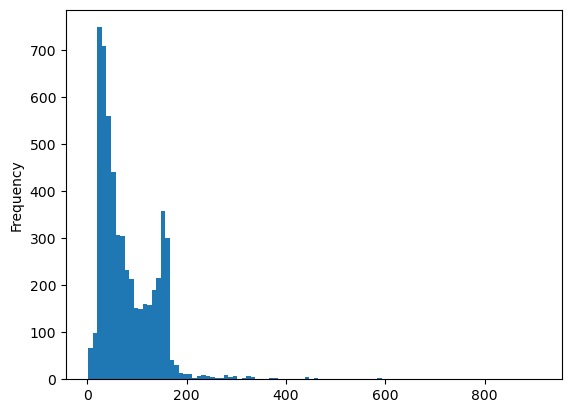

In [8]:
messages['Length'].plot(bins = 100, kind ='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

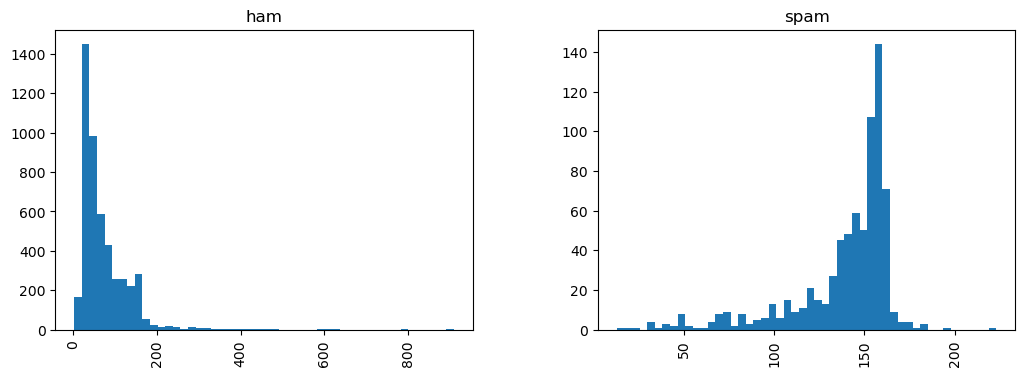

In [9]:
messages.hist(column = 'Length', by='Label', bins = 50, figsize=(12,4))

From above data visualization I noticed that:
"spam messages tend to have more characters"

([<matplotlib.patches.Wedge at 0x1640d0b90>,
 [Text(0.47994007214899487, -0.9897765036338344, 'ham'),
  Text(-0.4799400258142125, 0.9897765261014495, 'spam')],
 [Text(0.2617854938994517, -0.5398780928911824, '86.6%'),
  Text(-0.26178546862593405, 0.5398781051462451, '13.4%')])

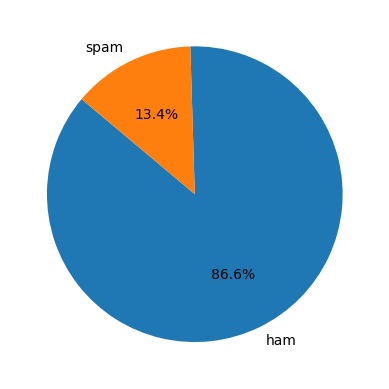

In [10]:
label_counts = messages['Label'].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)

# Data pre-processing 

    - Removing non-alphabetical characters with empty space with the help of re.sub
    - Lower the messages.
    - Removing the stopwords.
    - Performing Lemmatization on the messages.
    - Appending all the processed Messages to a corpus list.

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(0, len(messages)):
    
    # Remove non-alphabetic characters
    #--using "re.sub" from regular expression to find non-alphabetic in the message and make them to a empty space
    review = re.sub('[^a-zA-Z]', ' ', messages['Messages'][i])
    
    # Convert to lowercase
    review = review.lower()
    
    # Split into words
    review = review.split()
    
    # Lemmatize words and remove stopwords
    #--we remove stopwords then we perform lemmatiztion on it
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    
    # Join the words back into a single string
    review = ' '.join(review)
    
    # Append the processed review to the corpus
    corpus.append(review)


In [12]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

# TF-IDF (Term Frequency-Inverse Document Frequency)

It helps to down-weight common words while up-weighting rarer, more informative words.


- High TF-IDF Score: Indicates that a term is important in a specific document and rare across the entire corpus, making it a strong indicator of the document's content.

- Low TF-IDF Score: Indicates that a term is either too common in many documents or not informative for the document’s content.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus to get the TF-IDF matrix
X = vectorizer.fit_transform(corpus)


##--X is a sparse matrix where each row corresponds to a document.
##--Each column corresponds to a term from the vocabulary.
##-- The values in the sparse matrix are tf-idf scores.

In [14]:
# The vocabulary maps each term to a unique index.
vectorizer.vocabulary_

{'go': 2472,
 'jurong': 3198,
 'point': 4593,
 'crazy': 1337,
 'available': 431,
 'bugis': 826,
 'great': 2545,
 'world': 6935,
 'la': 3311,
 'buffet': 824,
 'cine': 1087,
 'got': 2508,
 'amore': 210,
 'wat': 6741,
 'ok': 4226,
 'lar': 3340,
 'joking': 3168,
 'wif': 6848,
 'oni': 4252,
 'free': 2293,
 'entry': 1912,
 'wkly': 6898,
 'comp': 1193,
 'win': 6859,
 'fa': 2042,
 'cup': 1394,
 'final': 2151,
 'tkts': 6264,
 'st': 5780,
 'may': 3705,
 'text': 6138,
 'receive': 4955,
 'question': 4854,
 'std': 5817,
 'txt': 6441,
 'rate': 4905,
 'apply': 292,
 'dun': 1772,
 'say': 5264,
 'early': 1792,
 'hor': 2809,
 'already': 182,
 'nah': 3983,
 'think': 6189,
 'usf': 6572,
 'life': 3421,
 'around': 340,
 'though': 6208,
 'freemsg': 2299,
 'hey': 2731,
 'darling': 1448,
 'week': 6783,
 'word': 6928,
 'back': 470,
 'like': 3433,
 'fun': 2352,
 'still': 5839,
 'tb': 6080,
 'xxx': 7005,
 'chgs': 1043,
 'send': 5348,
 'rcv': 4916,
 'even': 1960,
 'brother': 799,
 'speak': 5705,
 'treat': 6378,
 '

In [16]:
print(X)

  (0, 6741)	0.19633321258370512
  (0, 210)	0.351386238469353
  (0, 2508)	0.16456054199713366
  (0, 1087)	0.2968525142062683
  (0, 824)	0.335436146610067
  (0, 3311)	0.2843252556020137
  (0, 6935)	0.2355585846155011
  (0, 2545)	0.19410595173633666
  (0, 826)	0.2968525142062683
  (0, 431)	0.2628254467470435
  (0, 1337)	0.2721244533674184
  (0, 4593)	0.23993395270917753
  (0, 3198)	0.351386238469353
  (0, 2472)	0.15480706750496417
  (1, 4252)	0.5466243141314314
  (1, 6848)	0.43162957585464123
  (1, 3168)	0.5236804332035243
  (1, 3340)	0.4083258549263009
  (1, 4226)	0.2718944069420321
  (2, 292)	0.18816818026525658
  (2, 4905)	0.1800420188056223
  (2, 6441)	0.1380224544873437
  (2, 5817)	0.21922471060483015
  (2, 4854)	0.18636175467482702
  (2, 4955)	0.18636175467482702
  :	:
  (5567, 4745)	0.24554519598456814
  (5567, 4457)	0.2646132036333892
  (5567, 4905)	0.27970057754625877
  (5568, 1942)	0.6485991737677518
  (5568, 2280)	0.5597098620657655
  (5568, 2479)	0.3642369776828009
  (5568, 27

#### Looking at  Tf-Idf matrix

In [17]:
X_dense = X.toarray()

feature_names = vectorizer.get_feature_names_out()

In [18]:
X_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
df = pd.DataFrame(X_dense, columns=feature_names)

df.head()


#--Rows: Each row corresponds to a document in the corpus.
#--Columns: Each column corresponds to a term from the vocabulary.
#--Values: The values are the TF-IDF scores. Higher values indicate greater importance of the term in the document.

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zed,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
messages["Messages"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [21]:
pd.set_option('display.max_columns', None)

df.head(1)

aa  aah  aaniye  aaooooright  aathi   ab  abbey  abdomen  abeg  abel  \
0  0.0  0.0     0.0          0.0    0.0  0.0    0.0      0.0   0.0   0.0   

   aberdeen  abi  ability  abiola  abj  able  abnormally  aboutas  abroad  \
0       0.0  0.0      0.0     0.0  0.0   0.0         0.0      0.0     0.0   

   absence  absolutely  absolutly  abstract  abt  abta  aburo  abuse  abuser  \
0      0.0         0.0        0.0       0.0  0.0   0.0    0.0    0.0     0.0   

    ac  academic  acc  accent  accenture  accept  access  accessible  \
0  0.0       0.0  0.0     0.0        0.0     0.0     0.0         0.0   

   accidant  accident  accidentally  accommodation  accommodationvouchers  \
0       0.0       0.0           0.0            0.0                    0.0   

   accomodate  accomodations  accordin  accordingly  account  accounting  \
0         0.0            0.0       0.0          0.0      0.0         0.0   

   accumulation  achan  ache  achieve  acid  acknowledgement  acl  acnt  aco  \
0           0.0    0.0   0.0      0.0   0.0              0.0  0.0   0.0  0.0   

   across  act  acted  actin  acting  action  activ  activate  active  \
0     0.0  0.0    0.0    0.0     0.0     0.0    0.0       0.0     0.0   

   activity  actor  actual  actually   ad  adam  add  addamsfa  added  \
0       0.0    0.0     0.0       0.0  0.0   0.0  0.0       0.0    0.0   

   addicted  addie  adding  address  adewale  adi  adjustable  admin  \
0       0.0    0.0     0.0      0.0      0.0  0.0         0.0    0.0   

   administrator  admirer  admission  admit  adore  adoring  adp  adress  \
0            0.0      0.0        0.0    0.0    0.0      0.0  0.0     0.0   

   adrian  adrink  adsense  adult  advance  adventure  adventuring  advice  \
0     0.0     0.0      0.0    0.0      0.0        0.0          0.0     0.0   

   advise  advising  advisor   ae  aeronautics  aeroplane  afew  affair  \
0     0.0       0.0      0.0  0.0          0.0        0.0   0.0     0.0   

   affection  affectionate  affidavit  afford  afghanistan  afraid  africa  \
0        0.0           0.0        0.0     0.0          0.0     0.0     0.0   

   african  aft  afternon  afternoon  afterwards  aftr   ag  agalla  age  \
0      0.0  0.0       0.0        0.0         0.0   0.0  0.0     0.0  0.0   

   agency  agent  agidhane  aging  ago  agree   ah  aha  ahead  ahhh  ahhhh  \
0     0.0    0.0       0.0    0.0  0.0    0.0  0.0  0.0    0.0   0.0    0.0   

   ahmad  ahold  aid  aig  aight  aint  air  airport  airtel  aiya  aiyah  \
0    0.0    0.0  0.0  0.0    0.0   0.0  0.0      0.0     0.0   0.0    0.0   

   aiyar  aiyo   aj  ajith   ak  aka  akon   al  alaikkum  alaipayuthe  albi  \
0    0.0   0.0  0.0    0.0  0.0  0.0   0.0  0.0       0.0          0.0   0.0   

   album  alcohol  aldrine  alert  alertfrom  aletter  alex  alfie  algarve  \
0    0.0      0.0      0.0    0.0        0.0      0.0   0.0    0.0      0.0   

   algebra  algorithm  ali  alian  alibi  alive  allah  allalo  allday  alle  \
0      0.0        0.0  0.0    0.0    0.0    0.0    0.0     0.0     0.0   0.0   

   allo  allow  allowed  allows  almost  alone  along  alot  already  alright  \
0   0.0    0.0      0.0     0.0     0.0    0.0    0.0   0.0      0.0      0.0   

   alrite  also  alter  alternative  although  alto  aluable  alwa  always  \
0     0.0   0.0    0.0          0.0       0.0   0.0      0.0   0.0     0.0   

   alwys   am  amanda  amazing  ambitious  ambrith  american  ami  amigo  amk  \
0    0.0  0.0     0.0      0.0        0.0      0.0       0.0  0.0    0.0  0.0   

   amla  amma  ammae  ammo  amnow  among  amongst     amore  amount  amp  \
0   0.0   0.0    0.0   0.0    0.0    0.0      0.0  0.351386     0.0  0.0   

   amplikater  amrca  amrita  amt  amused  amy   an  ana  anal  analysis  \
0         0.0    0.0     0.0  0.0     0.0  0.0  0.0  0.0   0.0       0.0   

   anand  anderson  andre  andres  andrew  andros  angel  angry  animal  \
0    0.0       0.0    0.0     0.0     0.0     0.0   

# Splitting the dataset into test and train

In [22]:
messages.head(10)

,Label,Messages,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


##### False = Ham [Regular Message] {0}
##### True = Spam [Spam Message] {1}

In [26]:
y_1 = messages['Label'].map({'ham': 0, 'spam': 1}).values

In [28]:
print(type(y_1))

<class 'numpy.ndarray'>


### Target  {Dependent Variable}

In [29]:
y_1

array([0, 0, 1, ..., 0, 0, 0])

### {Independent Variable} 

In [71]:
X_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Spilting dataset

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dense, y_1, test_size= 0.20, random_state=42)

# Training Machine learning model {Multinomial Naive Bayes}

In [32]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

MultinomialNB()

# Evaluating the Model {Naive Bayes}

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.9713004484304932
Precision: 0.9915966386554622
Recall: 0.7919463087248322
F1-score: 0.8805970149253731


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[965   1]
 [ 31 118]]


# ABOVE MODEL:

## It misses out some spam messages which is why we see a 79% of recall. Which means some of the spam messages are shown as regular messages and comes to our normal inbox instead of landing into spam folder.

### To improve recall we will do grid_search to find alpha value which handles the zero probabilities.

# Hyperparameter Tuning 

For Multinomial Naive Bayes:
alpha (Laplace smoothing parameter): A smoothing parameter to handle zero probabilities. Typically, values between 0 and 1 are used.

In [39]:
from sklearn.model_selection import GridSearchCV
model_2 = MultinomialNB()

# Define the grid of hyperparameters:
##-- np.linsapce will go create 50 evenky spaced values between our specified starting and endpoints.
param_grid = {'alpha': np.linspace(0.01, 1.0, 50)}

# Perform grid search with cross-validation:
##-- "nb" is our model.
##-- "param_grid" are the 50 evenly space values.
##-- "cv=5" Entire training dataset will be divided into 5 equal parts. Model will be trained and validated 5 times, 
##--each time using a different fold as the test set and the remaining folds as the training set
grid_search = GridSearchCV(model_2, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.9280532212885154


# After finding the alpha value we will put that in our new model and will run it to see our metrics values

#### Creating a new model based on alpha we found

In [40]:
model_3 = MultinomialNB(alpha=0.01)
model_3.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

#### Printing the metrics values

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test set
y_pred = model_3.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.979372197309417
Precision: 0.92
Recall: 0.9261744966442953
F1-score: 0.9230769230769231


#### Printing out the confusion matrix

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[954  12]
 [ 11 138]]
